## Анализ 

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Загрузка базы данных 

In [2]:
data_train = pd.read_csv('EDAv1_Train.zip', compression='zip')
data_train.head(3)

,body_type,brand,color,fuel_type,model_year,n_doors,production_year,vehicle_transmission,engine_power,mileage,drive_type,n_owners,price,model_name,is_original_techpass,is_lefthand_drive,engine_displacement
0,седан,AUDI,чёрный,бензин,1990,4,1991,механика,174.0,350000,полный,3+,200000.0,100,1,1,2.8
1,седан,AUDI,красный,бензин,1982,4,1986,механика,90.0,173424,передний,3+,60000.0,100,1,1,1.8
2,универсал,AUDI,синий,бензин,1988,5,1989,механика,136.0,230000,полный,3+,99000.0,100,1,1,2.3


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86853 entries, 0 to 86852
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             86853 non-null  object 
 1   brand                 86853 non-null  object 
 2   color                 86853 non-null  object 
 3   fuel_type             86853 non-null  object 
 4   model_year            86853 non-null  int64  
 5   n_doors               86853 non-null  int64  
 6   production_year       86853 non-null  int64  
 7   vehicle_transmission  86853 non-null  object 
 8   engine_power          86853 non-null  float64
 9   mileage               86853 non-null  int64  
 10  drive_type            86853 non-null  object 
 11  n_owners              86853 non-null  object 
 12  price                 86853 non-null  float64
 13  model_name            86853 non-null  object 
 14  is_original_techpass  86853 non-null  int64  
 15  is_lefthand_drive  

Обучающая выборка содержит 86853 объекта. В основном категориальные признаки и немого числовых. Рссмотрим более подробно              

In [4]:
data_test = pd.read_csv('EDAv1_Test.zip', compression='zip')
data_test.head(3)

,body_type,brand,color,engine_displacement,engine_power,fuel_type,mileage,model_year,model_name,n_doors,production_year,vehicle_transmission,n_owners,drive_type,is_original_techpass,is_lefthand_drive
0,лифтбек,SKODA,синий,1.2,105.0,бензин,74000,2013,OCTAVIA,5,2014,робот,3+,передний,1,1
1,лифтбек,SKODA,чёрный,1.6,110.0,бензин,60563,2017,OCTAVIA,5,2017,механика,1,передний,1,1
2,лифтбек,SKODA,серый,1.8,152.0,бензин,88000,2013,SUPERB,5,2014,робот,1,передний,1,1


**Распределение объявлений по типу кузова**

In [5]:
body_type = dict(data_train.body_type.value_counts()).keys()

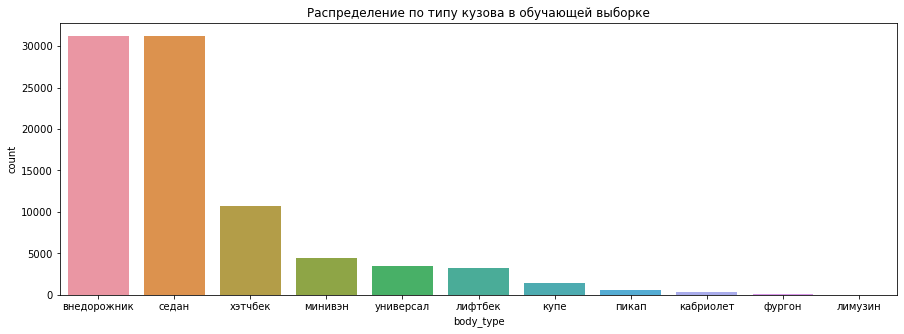

In [6]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='body_type', data=data_train,  order=body_type)
ax.set(title='Распределение по типу кузова в обучающей выборке')
print()

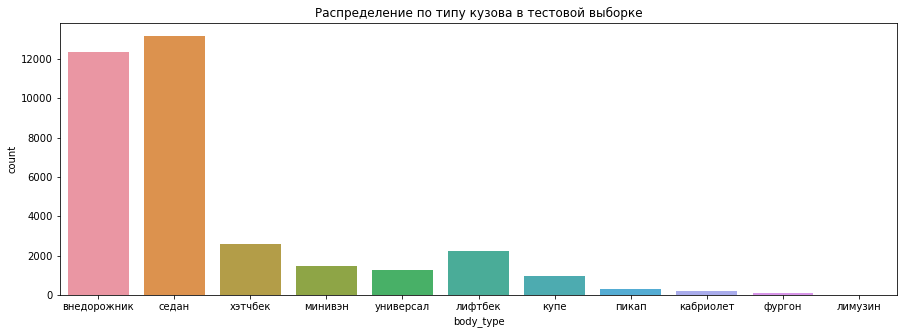

In [7]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='body_type', data=data_test, order=body_type)
ax.set(title='Распределение по типу кузова в тестовой выборке')
print()

В двух выборках лидирующую позицию занимают внедорожник и седан. Самые актуальные автомобили для жителей гороов. Остальные типы кузовов представены в  меньшей степени. Совсем мало экзотических машин, таких как лимузин, кабриолет, фургон, пикап.

**Распределение по маркам (брендам) автомобилей**

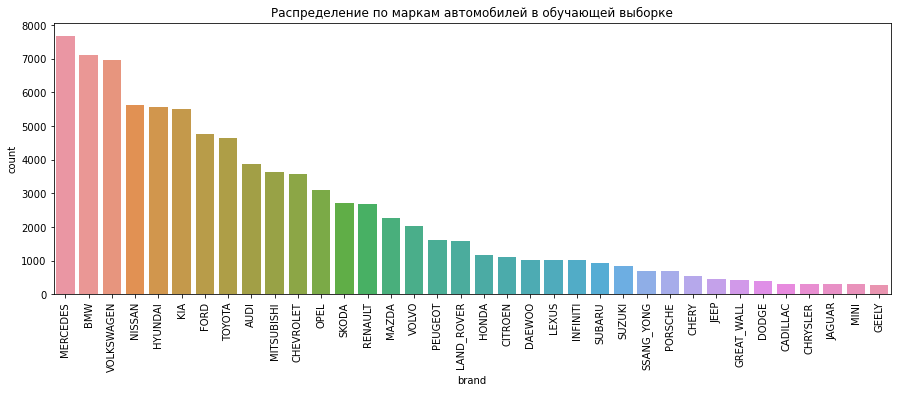

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='brand', data=data_train, order=dict(data_train.brand.value_counts()).keys())
ax.set(title='Распределение по маркам автомобилей в обучающей выборке')
plt.xticks(rotation=90)
print()

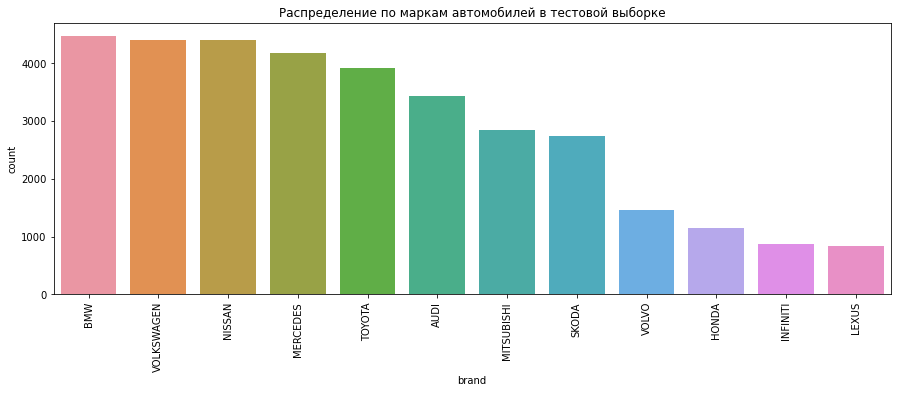

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='brand', data=data_test, order=dict(data_test.brand.value_counts()).keys())
ax.set(title='Распределение по маркам автомобилей в тестовой выборке')
plt.xticks(rotation=90)
print()

В обучающей выборке собрано гораздо больше марок автомобилей, чем в тестовой, по которой необходимо построить прогноз.
Но распределение по количественному соотношение соответсвует. Больше всего BMW, Volkswagen, Mersedes, Nissan и по убывающей. 

**Распределение по цвету**

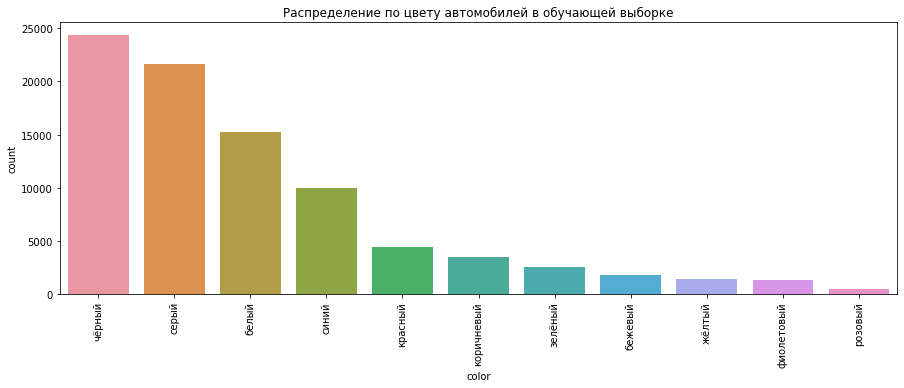

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='color', data=data_train, order=dict(data_train.color.value_counts()).keys())
ax.set(title='Распределение по цвету автомобилей в обучающей выборке')
plt.xticks(rotation=90)
print()

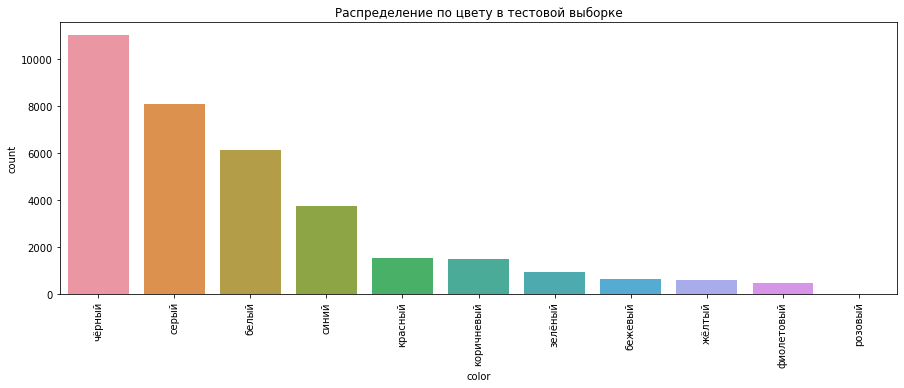

In [11]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='color', data=data_test, order=dict(data_test.color.value_counts()).keys())
ax.set(title='Распределение по цвету в тестовой выборке')
plt.xticks(rotation=90)
print()

Соотношение по цвету между двумя выборками соответствует. На продажу больше всего выставлено машин монохромных (от черного к белому). Присутсвуют цвета и на любителя (желтый, розовый, фиолетовый), но в гораздо меньшем объеме.

Как и ожидалось, в основном бензиновые двигатели (самый ходовой вид топлива на данный момент). Гораздо меньше дизельного. И очень мало гибридов, электро и газа.

**Года выпуска автомобилей**

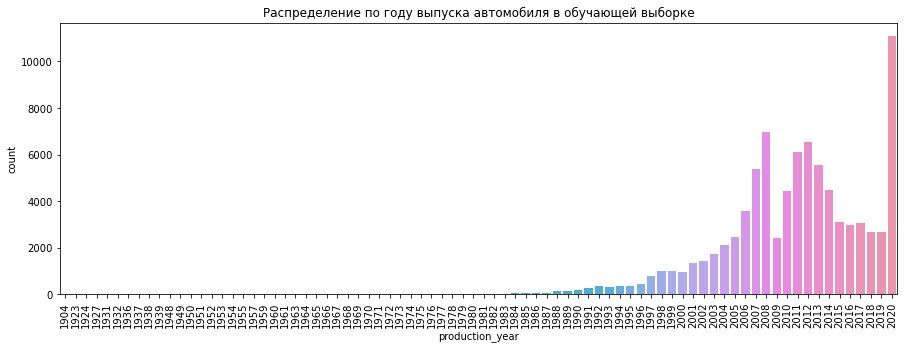

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='production_year', data=data_train)
ax.set(title='Распределение по году выпуска автомобиля в обучающей выборке')
plt.xticks(rotation=90)
print()

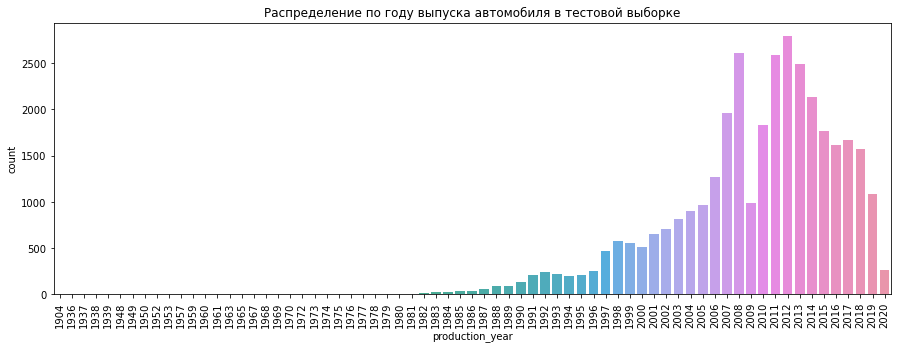

In [13]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='production_year', data=data_test)
ax.set(title='Распределение по году выпуска автомобиля в тестовой выборке')
plt.xticks(rotation=90)
print()

В обучающей выборке присутсвует много автомобилей 2020 года, при том, что база собрана в 2020 году. Что говорит - это новые автомомбили. В тестовой выборке, так же собранной в 2020 совсем новых автомобилей гораздо меньше.  Больше всего с 2005 по 2017 при данных сбора в 2020 году.

In [14]:
data_train[data_train['production_year']<1985]['price'].describe().round(0)

count         222.0
mean      2348026.0
std       5388232.0
min         25000.0
25%        150000.0
50%        505000.0
75%       2000000.0
max      52500000.0
Name: price, dtype: float64

In [15]:
data_train[(data_train['production_year']<1985) &(data_train['price']>15_000_000)][['brand', 'model_name', 'production_year', 'price']]

,brand,model_name,production_year,price
86027,MERCEDES,W111,1970,19800000.0
86135,MERCEDES,W128,1959,15900000.0
86136,MERCEDES,W128,1959,17000000.0
86137,MERCEDES,W136,1936,35000000.0
86139,MERCEDES,W186,1953,22434224.0
86140,MERCEDES,W188,1952,52500000.0


Получив статистические данны по самым старым машинам в обучающей выборке видим, что тут есть как совсем дешевые за 25 тыс, так и очень дорогие за 52 млн 500 тыс. 

Всего таких 222 автомобилей. Медианное значение 505 тыс, а среднее 2,34 млн. Это говорит о присутсвии очень дорогих раритетных авто, что дает смещение среднего значение в большую сторону, а так же стандартное отклонение 5,39 млн и 

Но выкидывать такие автомобили не стоит пока. Так как в тестовой выборке также присутсвуют очень старые автомобили, а стоимость их надо будет предсказать. Тут необходимо будет принять решение после получения метрик качества обучения моделей.

**Тип топлива**

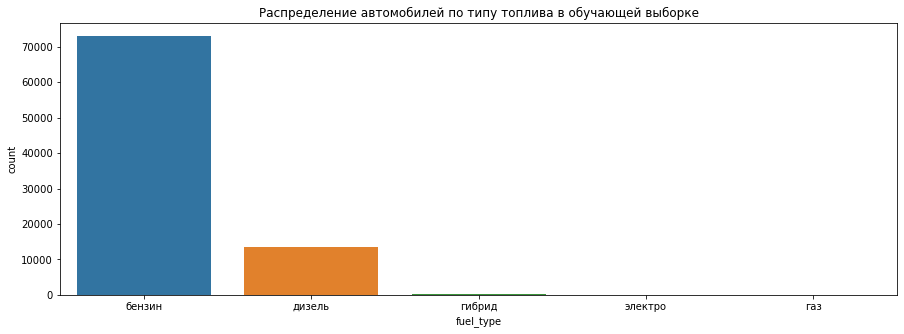

In [16]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='fuel_type', data=data_train, order=dict(data_train.fuel_type.value_counts()).keys())
ax.set(title='Распределение автомобилей по типу топлива в обучающей выборке')
print()

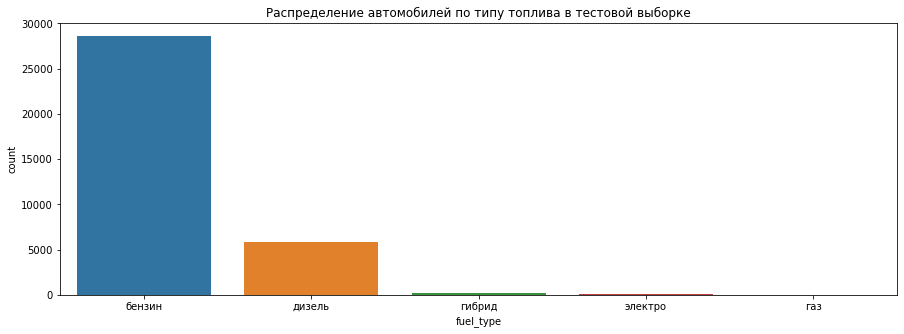

In [17]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='fuel_type', data=data_test, order=dict(data_test.fuel_type.value_counts()).keys())
ax.set(title='Распределение автомобилей по типу топлива в тестовой выборке')
print()

**Тип трансмиссии**

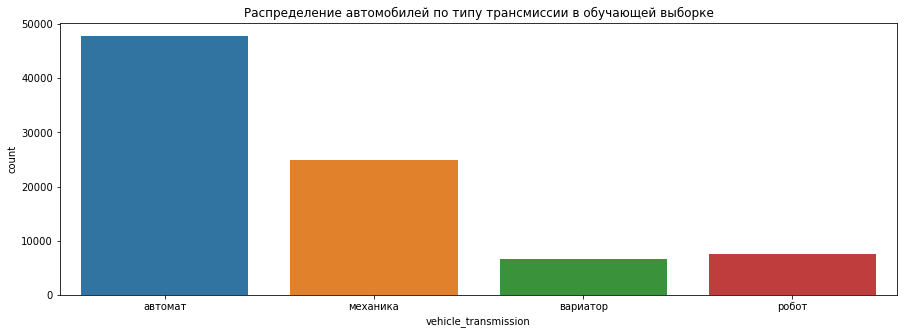

In [18]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='vehicle_transmission', data=data_train, order=['автомат', 'механика', 'вариатор', 'робот'])
ax.set(title='Распределение автомобилей по типу трансмиссии в обучающей выборке')
print()

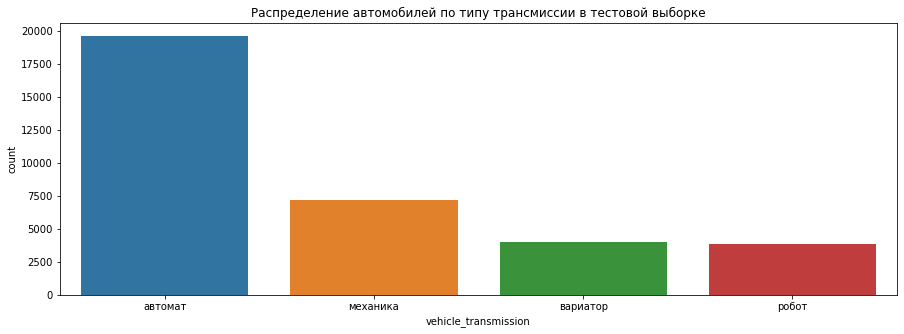

In [19]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='vehicle_transmission', data=data_test, order=['автомат', 'механика', 'вариатор', 'робот'])
ax.set(title='Распределение автомобилей по типу трансмиссии в тестовой выборке')
print()

Соотношение распределения одинаковое. Большинство автомобилей на автоматической коробке, дальше по нисподающей.

**Привод**

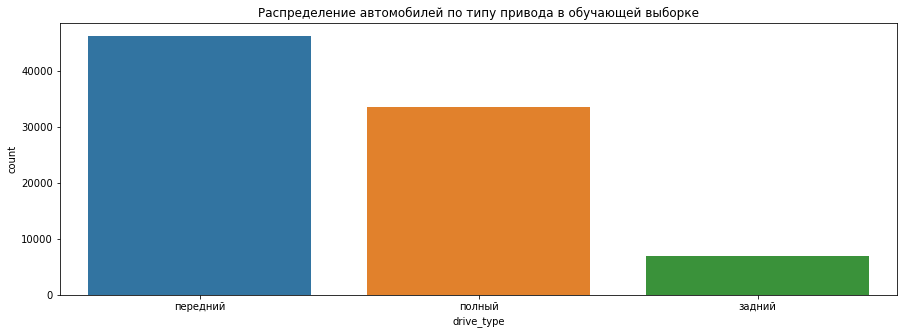

In [20]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='drive_type', data=data_train, order=['передний', 'полный', 'задний'])
ax.set(title='Распределение автомобилей по типу привода в обучающей выборке')
print()

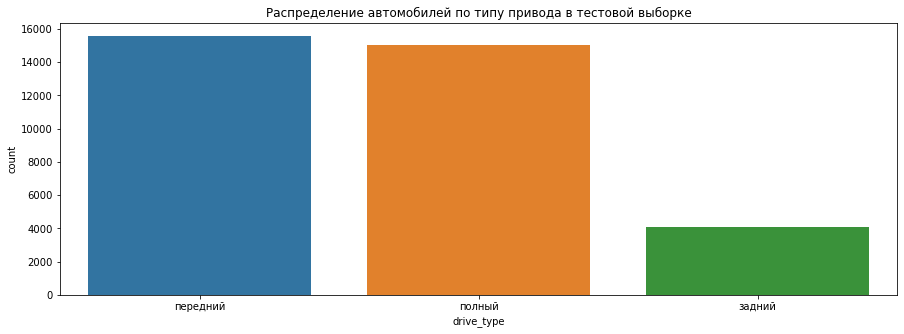

In [21]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='drive_type', data=data_test, order=['передний', 'полный', 'задний'])
ax.set(title='Распределение автомобилей по типу привода в тестовой выборке')
print()

**Мощность двигателя в л.с.**

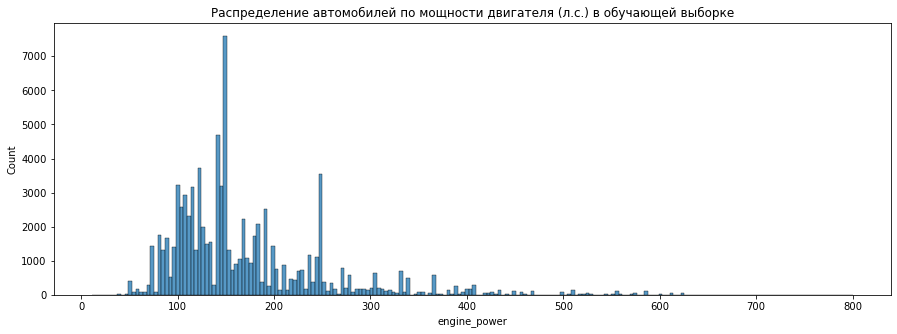

In [22]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_train['engine_power'])
ax.set(title='Распределение автомобилей по мощности двигателя (л.с.) в обучающей выборке')
print()

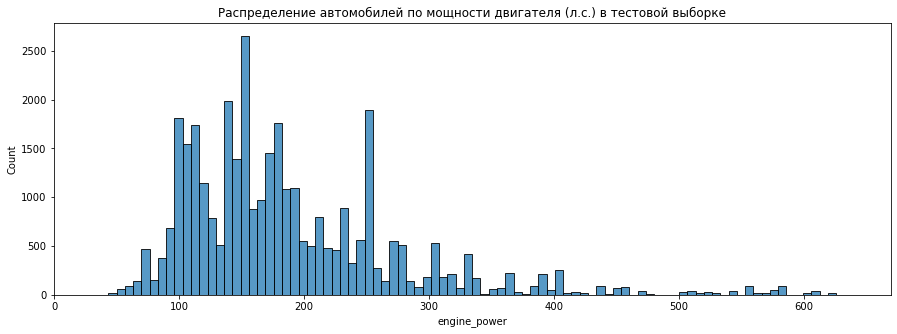

In [23]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_test['engine_power'])
ax.set(title='Распределение автомобилей по мощности двигателя (л.с.) в тестовой выборке')
print()

В основнов в двух выборках машины мощностью от 100 до 200 лс. В тестовой выборке присутсвуют модели свыше 400 и до 650 лс. В в обучающей выборке есть модели 700-800 л.с., что являеся очень подозрительным. Желательно перепроверить по катологу.

In [24]:
print('Список машина мощностью более 500 л.с.')
data_train[data_train['engine_power']>500][['brand', 'body_type', 'model_name', 'production_year', 'engine_power']].groupby(['brand','model_name'])[['engine_power']].count()

Список машина мощностью более 500 л.с.


engine_power
brand      model_name                        
AUDI       R8                               2
           RS6                             12
           RS7                              4
           S8                               8
BMW        5ER                              1
           7ER                             13
           8ER                              6
           M5                              37
           M6                               7
           M8                               4
           X3_M                             1
           X5                               8
           X5_M                            66
           X6                               2
           X6_M                            88
           X7                               3
CADILLAC   CTS_V                            1
CHEVROLET  CAMARO                           2
           CORVETTE                         1
DODGE      CHALLENGER                       2
           RAM                              1
           VIPER                            1
FORD       MUSTANG                          3
JAGUAR     F_TYPE                           5
           XFR                              3
           XJ                               3
           XKR                              3
JEEP       GRAND_CHEROKEE                   1
LAND_ROVER RANGE_ROVER                     78
           RANGE_ROVER_SPORT               53
MERCEDES   AMG_GLC_COUPE                    2
           AMG_GT                          14
           CLS_KLASSE_AMG                  11
           CL_KLASSE                        3
           CL_KLASSE_AMG                   10
           C_KLASSE_AMG                    11
           E_KLASSE_AMG                    25
           GLC_KLASSE_AMG                   1
           GLE_KLASSE_AMG                  14
           GLE_KLASSE_COUPE_AMG            20
           GLS_KLASSE_AMG                  14
           GL_KLASSE_AMG                   10
           G_KLASSE_AMG                    86
           MAYBACH_GLS                      3
           M_KLASSE_AMG                    28
           SLR_KLASSE                       2
           SLS_AMG                          3
           SL_KLASSE_AMG                    5
           S_CLASS_MAYBACH                 16
           S_KLASSE                        22
           S_KLASSE_AMG                    88
NISSAN     GT_R                             7
PORSCHE    911                              6
           911_GT3                          1
           918_SPYDER                       1
           CAYENNE                         12
           PANAMERA                        24
           TAYCAN                           5

**Объем двигателя, л.**

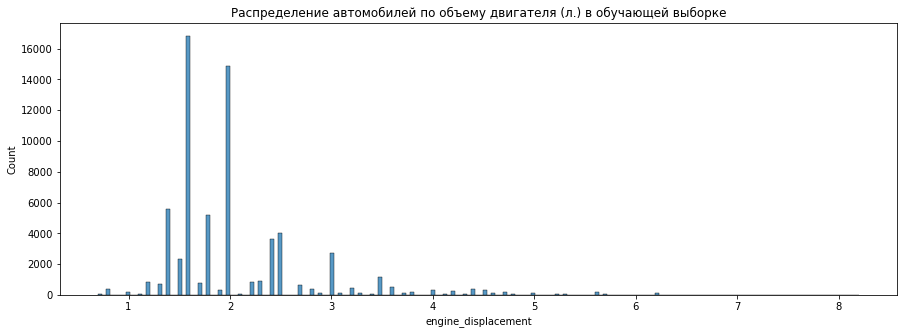

In [25]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_train['engine_displacement'])
ax.set(title='Распределение автомобилей по объему двигателя (л.) в обучающей выборке')
print()

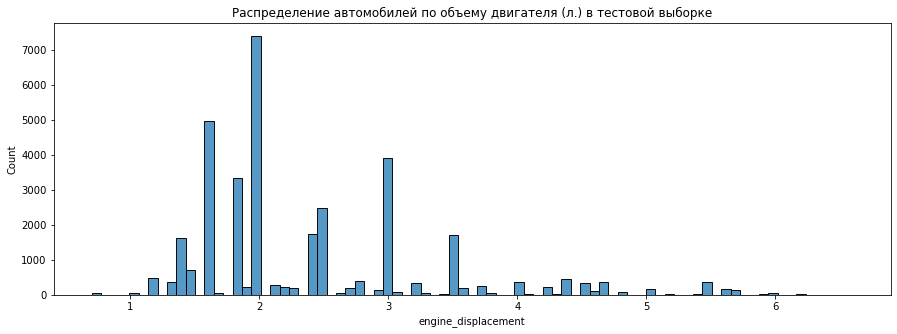

In [26]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_test['engine_displacement'])
ax.set(title='Распределение автомобилей по объему двигателя (л.) в тестовой выборке')
print()

В соответсвии с мощностью двигателя наблюдаем ту же картину. В основном астомобили от 1,2 литра, до 3. Но есть и с очень большим литражем. Это должны быть те-же автомобили, что и с большой мощностью.

**Пробег**

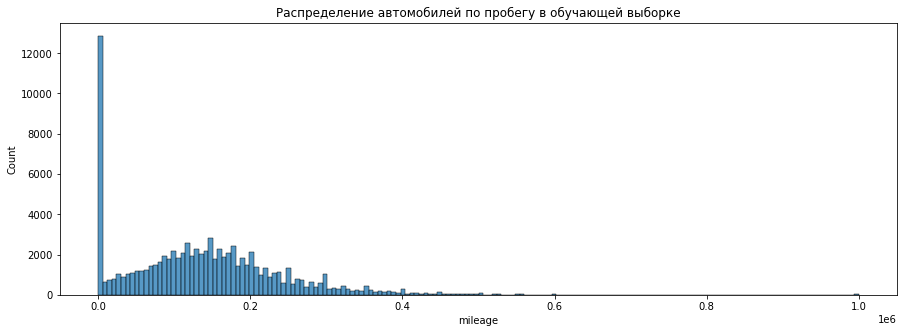

In [27]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_train['mileage'])
ax.set(title='Распределение автомобилей по пробегу в обучающей выборке')
print()

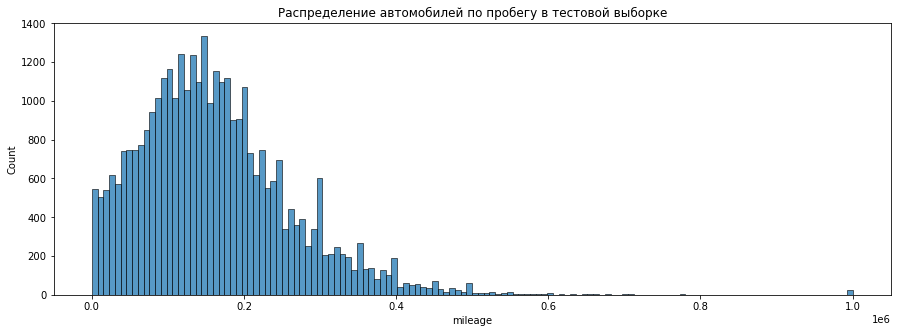

In [28]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_test['mileage'])
ax.set(title='Распределение автомобилей по пробегу в тестовой выборке')
print()

In [29]:
data_train['mileage'].describe().round(0)

count      86853.0
mean      137227.0
std       102390.0
min            0.0
25%        62000.0
50%       131680.0
75%       196000.0
max      1000000.0
Name: mileage, dtype: float64

In [30]:
data_test['mileage'].describe().round(0)

count      34686.0
mean      162010.0
std       100677.0
min            1.0
25%        91154.0
50%       149780.0
75%       215000.0
max      1000000.0
Name: mileage, dtype: float64

В обучающей выборке много предложений совершенно новых автомобилей. Так как пробег 0 и год выпуска = году сбора данных.  Среднее значение пробега 130-135 тысяч км. Максимальное 1 млн. Но такой есть и в тестовой выборке. Его надобно оставить.

В тестовой выборке средний пробег немного выше 150-160 тыс км. Стандартное отклонение одинаковое.

**Цена продажи**

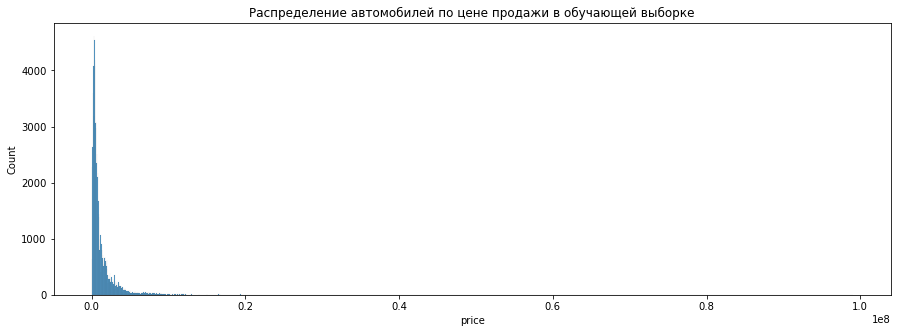

In [31]:
fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data_train['price'])
ax.set(title='Распределение автомобилей по цене продажи в обучающей выборке')
print()

In [32]:
data_train['price'].describe().round(0)

count       86853.0
mean      1260905.0
std       1923672.0
min         16000.0
25%        350000.0
50%        649000.0
75%       1400000.0
max      99000000.0
Name: price, dtype: float64

Статистические показатели более наглядно, чем график показывают общую картину по стоимости. Самый дешевый автомобиль выставлен за 16 тыс. А самый дорогой за 99 млн. Разброс очень большой. Поэтому и отличаются медианное и среднее значение в 2 раза. Так как распределение не является нормаьным. А имеет длинный хвост в сторону увеличения цены.

Медианное значение стоимости 650 тыс руб. 



In [33]:
data_train.corr()

,model_year,n_doors,production_year,engine_power,mileage,price,is_original_techpass,is_lefthand_drive,engine_displacement
model_year,1.000000,0.176490,0.968874,0.219376,-0.695899,0.435997,0.238789,0.185006,-0.057800
n_doors,0.176490,1.000000,0.186254,0.013248,-0.096628,0.050768,0.081255,0.021000,0.107511
production_year,0.968874,0.186254,1.000000,0.192441,-0.724837,0.446118,0.249365,0.198013,-0.074900
engine_power,0.219376,0.013248,0.192441,1.000000,-0.168916,0.554969,0.005181,0.055037,0.825891
mileage,-0.695899,-0.096628,-0.724837,-0.168916,1.000000,-0.460979,-0.217707,-0.121549,0.077912
price,0.435997,0.050768,0.446118,0.554969,-0.460979,1.000000,0.120192,0.063575,0.342344
is_original_techpass,0.238789,0.081255,0.249365,0.005181,-0.217707,0.120192,1.000000,0.046339,-0.041144
is_lefthand_drive,0.185006,0.021000,0.198013,0.055037,-0.121549,0.063575,0.046339,1.000000,0.022546
engine_displacement,-0.057800,0.107511,-0.074900,0.825891,0.077912,0.342344,-0.041144,0.022546,1.000000


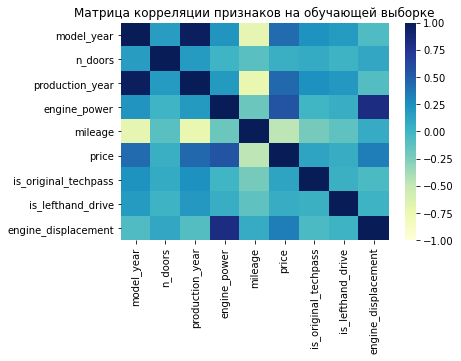

In [34]:
heatmap = sns.heatmap(data_train.corr(), vmin=-1, vmax=1, cmap="YlGnBu")
heatmap.set_title('Матрица корреляции признаков на обучающей выборке'); 

Есть признаки сильно скоррелированные между собой:

  - production_year и model_year. В данном варианте год производства важнее. 
  - engine_power и engine_displacement. Объем двигателя и мощность в л.с. в принципе взамимозависимы, У электродвигателей нет объема двигателя, а есть кВт. У гибридов тоже своя особенность. А вот мощность в л.с. есть у всех. Возможно оставить признак engine_power.

  - большая отрецательная корреляция между пробегом и годом производста. Что вполне логично. Чем старше атомобиль (год меньше), тем больше пробег.

In [35]:
# Список моделей, которые есть в тестовой выборке, но их нет в обучающей.
print(set(data_test['model_name'].unique())-set(data_train['model_name'].unique()))

{'ARTEON', 'GOLF_R32', 'IST', 'COROLLA_II', 'SPARKY', 'ZEST', '300ZX', 'X4_M', 'LANCER_RALLIART', 'POLO_GTI', 'OTTI', 'LM', 'PRESEA', 'RSQ3', 'Z', 'TORNEO', 'WILL_CYPHA', 'PORTE'}


**Вывод:** В целом распределение признаков в выборках соответсвует между собой. Только в обучающей выборке представлено большее количество марок (brand) автомобилей и больше предложений новых авто.

Но в тоже время, есть 18 моделей авто, которые есть в тестовой, но отсутсвуют в обучающей. Возможно модель по другим параметрам сможет определить их стоимость.

По результатам метрик можно будет смотреть, стоит еще искать дополнительные объекты (базы объявлений) или этого набора будет хватать.
    
    